<a href="https://colab.research.google.com/github/kalpana12-99/Petro_Prjoects/blob/main/Petro_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

the best

# **Plotting Inflow Performance Relationship (IPR) Curve using Vogel's Equation**

In [ ]:
#Lets assume data
Pr=2500 #psig
Qi=4500 #stb\day at a Pwf=1000 #psig
Pwf=1000 #psig

In [ ]:
#Calculation of maximum flow rate using Vogel's Equation
# Qi/Qo_max=[1-0.2*(Pwf/Pr)-0.8*(Pwf/Pr)**2]
Qo_max=Qi/(1-0.2*(Pwf/Pr)-0.8*(Pwf/Pr)**2)
Qo_max

5681.818181818182

In [ ]:
#Calculating of flow rate at different Bottom hole flowing Pressure
Pwf=np.linspace(Pr,0)
Q_cal=[]
for i in Pwf:
    Q=(Qo_max*(1-0.2*(i/Pr)-0.8*(i/Pr)**2))
    Q_cal.append(Q)

In [ ]:
#Creating dataframe
df=pd.DataFrame({
    "Pwf":Pwf,
    "Q":Q_cal
})
df.head()

,Pwf,Q
0,2500.000000,0.000000
1,2448.979592,206.826701
2,2397.959184,409.867101
3,2346.938776,609.121200
4,2295.918367,804.588997


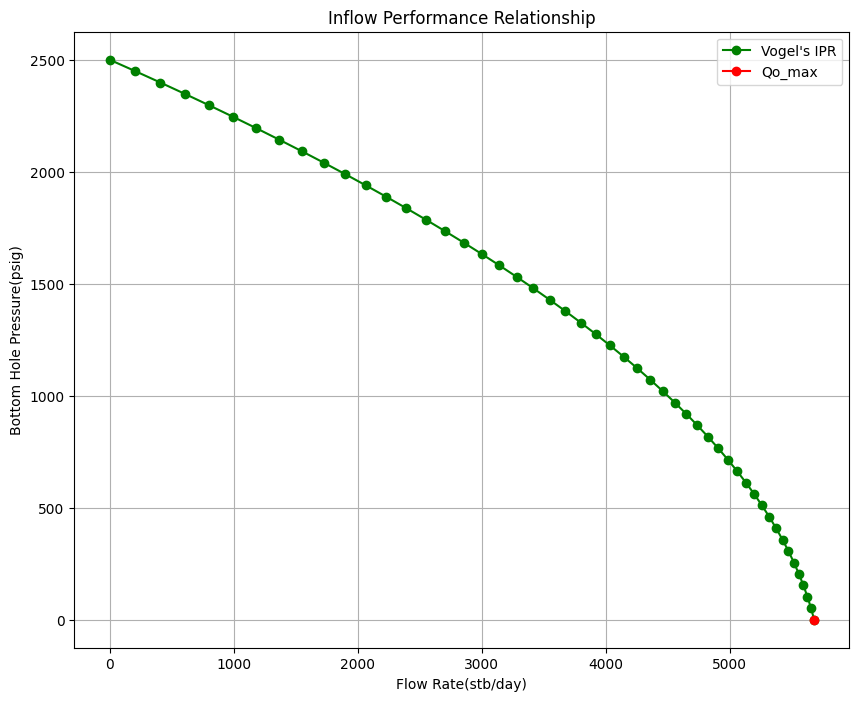

In [ ]:
#Ploting IPR using Vogel Equation
plt.figure(figsize=(10,8))
plt.plot(Q_cal,Pwf,color="green",marker="o",label="Vogel's IPR")
plt.plot(Qo_max,0,color="red",marker="o",label="Qo_max")
plt.xlabel("Flow Rate(stb/day)")
plt.ylabel("Bottom Hole Pressure(psig)")
plt.title("Inflow Performance Relationship")
plt.legend()
plt.grid()
plt.show()

# Plotting Tubing Performance Relationship (TPR) Curves for various tubing size using Dataset from **PetroWiki**

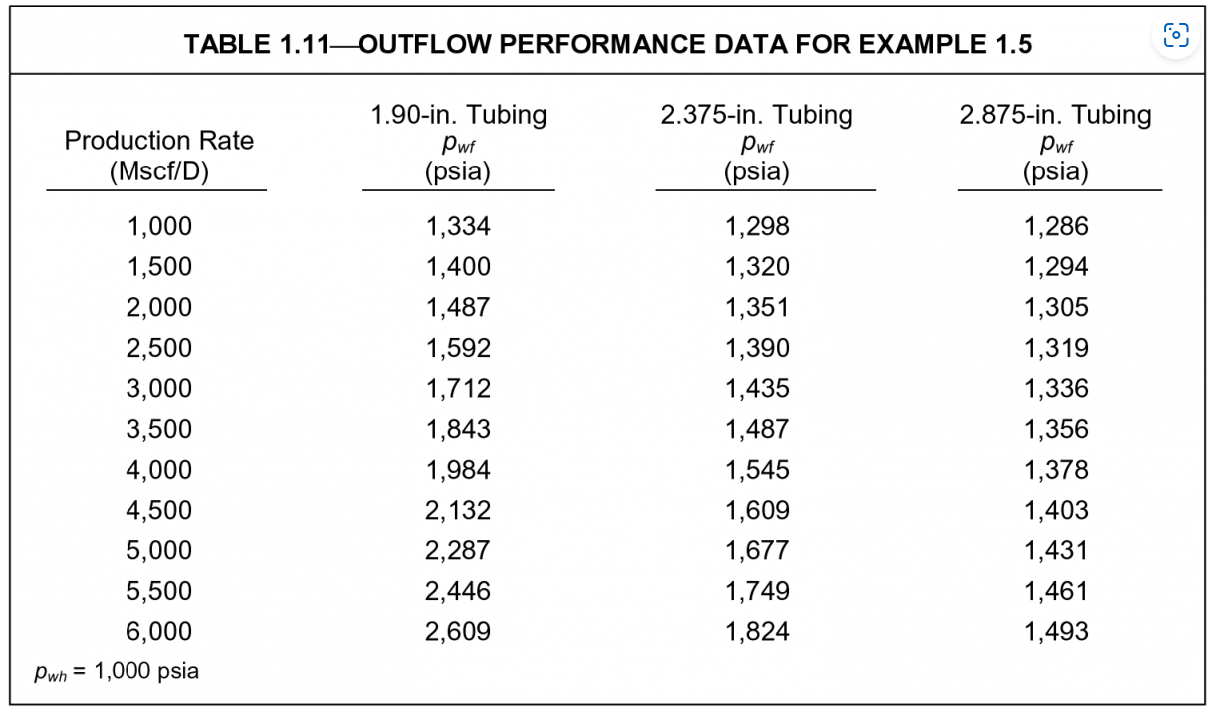

In [ ]:
#Uploading TPR dataset(PetroWiki)
#Assume the following data for oil reservoir instead of gas to generate tpr
q_tpr=np.arange(1000,6500,500)
p_190=[1334,1400,1487,1592,1712,1843,1984,2132,2287,2446,2609]
p_2875=[1286,1294,1305,1319,1336,1356,1378,1403,1431,1461,1493]
p_2375=[1298,1320,1351,1390,1435,1487,1545,1609,1677,1749,1824]

In [ ]:
df=pd.DataFrame({
    "Q":q_tpr,
    "P_190":p_190,
    "P_2875":p_2875,
    "P_2375":p_2375

})

In [ ]:
df.head()

,Q,P_190,P_2875,P_2375
0,1000,1334,1286,1298
1,1500,1400,1294,1320
2,2000,1487,1305,1351
3,2500,1592,1319,1390
4,3000,1712,1336,1435


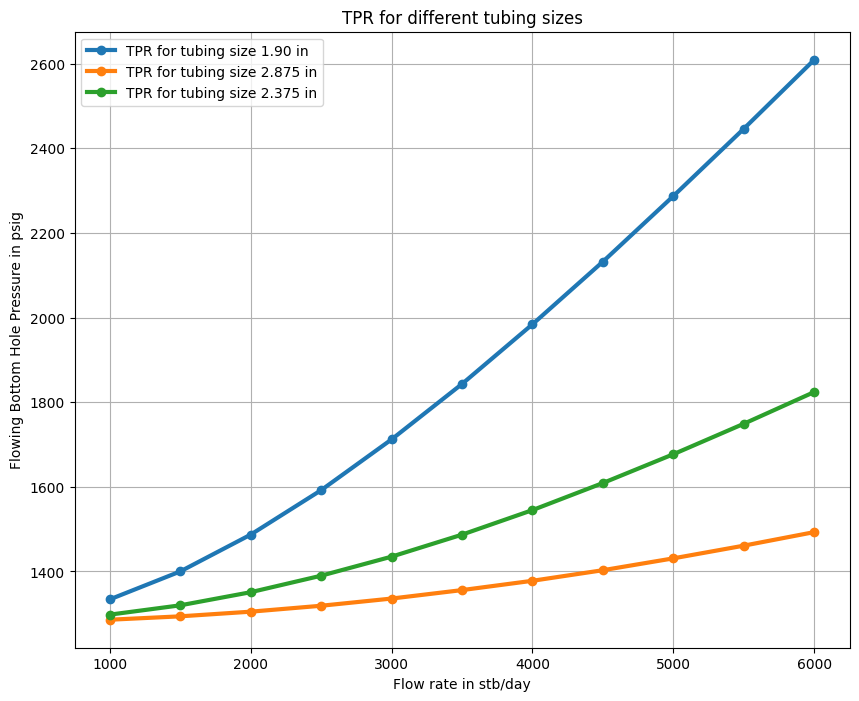

In [ ]:
#Plotting of TPR
plt.figure(figsize=(10,8))
plt.plot(df["Q"],df["P_190"],label="TPR for tubing size 1.90 in",lw=3,marker='o')
plt.plot(df["Q"],df["P_2875"],label="TPR for tubing size 2.875 in",lw=3,marker='o')
plt.plot(df["Q"],df["P_2375"],label="TPR for tubing size 2.375 in",lw=3,marker='o')
plt.xlabel("Flow rate in stb/day")
plt.ylabel("Flowing Bottom Hole Pressure in psig")
plt.title("TPR for different tubing sizes")
plt.legend()
plt.grid()
plt.show()

# Consolidated IPR and TPR curves into a single graph to identify optimal operating points for each tubing **size**

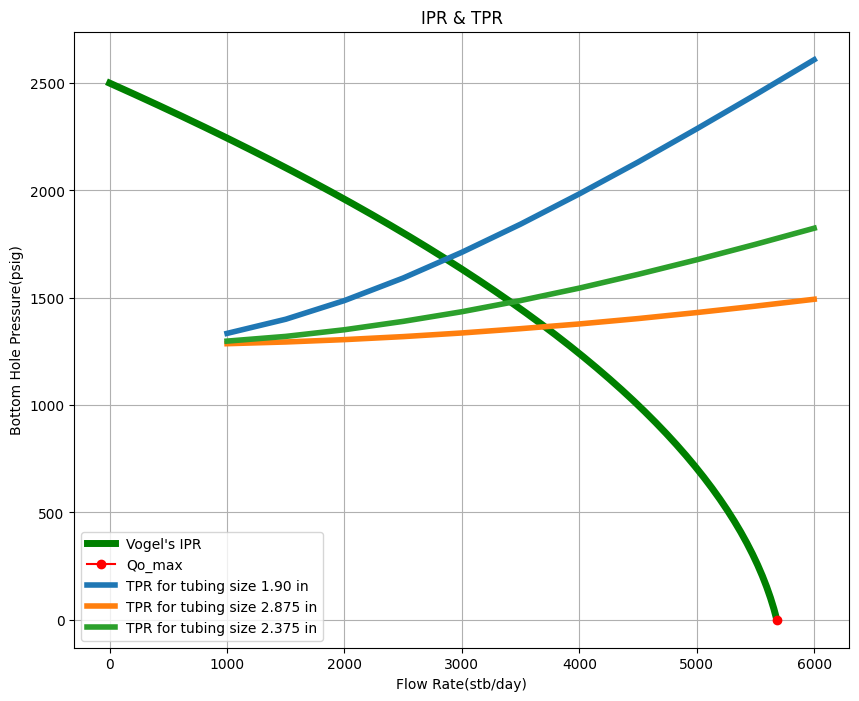

In [ ]:
#Plot of IPR and TPR
plt.figure(figsize=(10,8))
plt.plot(Q_cal,Pwf,color="green",lw=5,label="Vogel's IPR")
plt.plot(Qo_max,0,color="red",marker="o",label="Qo_max")
plt.plot(df["Q"],df["P_190"],label="TPR for tubing size 1.90 in",lw=4)
plt.plot(df["Q"],df["P_2875"],label="TPR for tubing size 2.875 in",lw=4)
plt.plot(df["Q"],df["P_2375"],label="TPR for tubing size 2.375 in",lw=4)
plt.title("IPR & TPR")
plt.xlabel("Flow Rate(stb/day)")
plt.ylabel("Bottom Hole Pressure(psig)")
plt.legend()
plt.grid()
plt.show()